<h1 style="text-align:center;color:#00917c">Automatic Keyword Extractor using RAKE-NLTK</h1>

In [1]:
# import the necessary lib

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

from rake_nltk import Rake,Metric

## Loading the Dataset

In [2]:
raw_data = pd.read_csv('./datasets/podcasts.csv')

# information about the dataset
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121175 entries, 0 to 121174
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   uuid         121175 non-null  object
 1   title        121173 non-null  object
 2   image        121175 non-null  object
 3   description  119832 non-null  object
 4   language     121175 non-null  object
 5   categories   121175 non-null  object
 6   website      120005 non-null  object
 7   author       118678 non-null  object
 8   itunes_id    121175 non-null  int64 
dtypes: int64(1), object(8)
memory usage: 8.3+ MB


In [3]:
raw_data.shape

(121175, 9)

# EDA 

<ol start='1'><li><h3> Lets remove those empty/NaN data </h3></li></ol>

Explanation: In pandas we have a method called dropna which removes empty or NaN data <br>
  * `how=` how takes string value of two kinds only (‘any’ or ‘all’). <br>‘any’ drops the row/column if ANY value is Null and ‘all’ drops only if ALL values are null.

In [9]:
print("Percentage of empty data before cleaning: \n\n",raw_data.isnull().sum()/raw_data.shape[0] * 100)
raw_data.dropna(axis=0,how='any',inplace=True)
print("\n Percentage of empty data after cleaning: \n\n",raw_data.isnull().sum()/raw_data.shape[0] * 100)

Percentage of empty data before cleaning: 

 uuid           0.0
title          0.0
image          0.0
description    0.0
language       0.0
categories     0.0
website        0.0
author         0.0
itunes_id      0.0
dtype: float64

 Percentage of empty data after cleaning: 

 uuid           0.0
title          0.0
image          0.0
description    0.0
language       0.0
categories     0.0
website        0.0
author         0.0
itunes_id      0.0
dtype: float64


<ol start='2'><li><h3> Lets check how many languages we have in here</h3></li></ol>

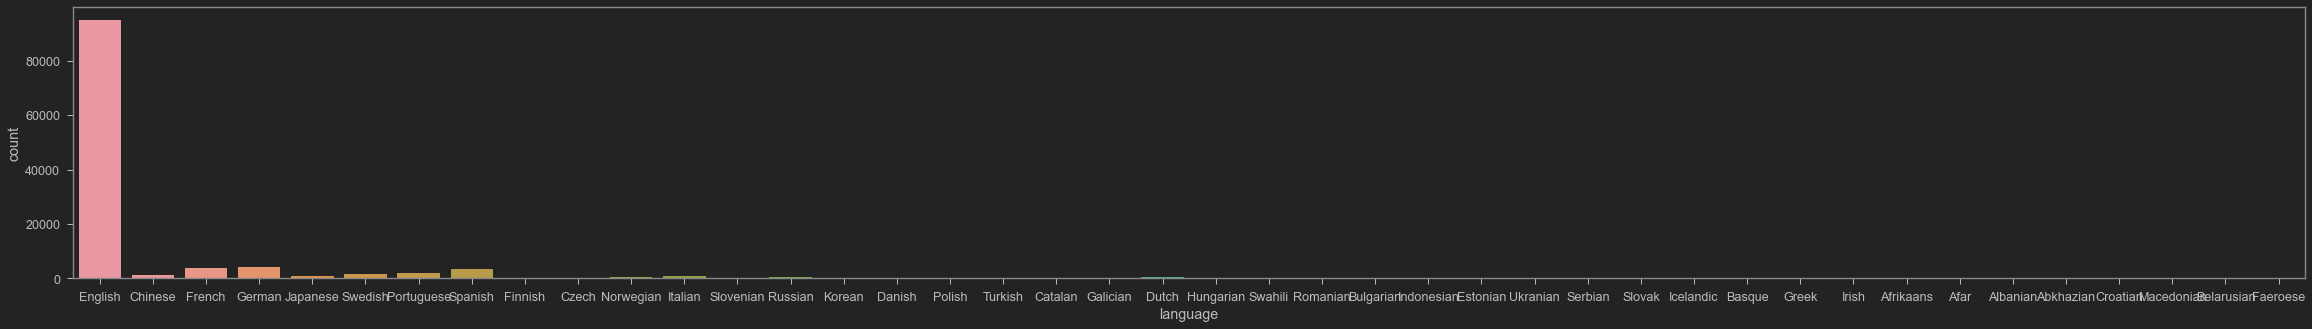

In [10]:
plt.figure(figsize=(40,5))
sns.countplot(x=raw_data.language)

<ol start='3'><li><h3>selecting feature columns</h3></li></ol>
<ul>
<li>For the keyword extraction problem we would require only <code>['title','description','language']</code> columns </li>
<li>Filter out English language alone, by adding a condition to the language column</li>
<li>Also our dataset has 121 Thousand+ rows, for our learning purpose lets cut it down to random 50 rows </li></ul>

In [11]:
df = raw_data[['title','description']].loc[raw_data.language == "English"].sample(n=50, random_state=104)
df.head(6)

,title,description
105462,The Sisters Grimm Podcast,The Sisters Grimm Podcast is hosted by real li...
110399,Rich Take On Sports,Host Richmond Weaver explores the influence an...
77128,CB and Soos Show,The CB and Soos show features two 90’s kids ta...
70809,Clash Planet,Podcast by Clash Planet Podcast
89842,Back to Bassics,Legendary Bassist Jeff Berlin talks about all ...
66858,The Art of Broke Podcast,A no BS lifestyle podcast on personal finance ...


# Removing the STOPWORDS after tokenization

In [7]:
# tokenizer


# IMPORTING THE STOPWORDS FOR ENGLISH LANGUAGE

stop_words = list(set(stopwords.words('english')))

In [8]:
def filter_stopwords(x):
    words = word_tokenize(x)
    token = []
    for i in words:
        if i not in stop_words:
            token.append(i)
    return token

df['f_tokens']=df.description.apply(filter_stopwords)

# Lemmatization tokens in base form with WORDNET Nltk tool

In [9]:
df.columns

Index(['title', 'description', 'f_tokens'], dtype='object')

In [10]:

lemmatizer =  WordNetLemmatizer()

def lema(x):
    lemas = []
    for i in x:
        lemas.append(lemmatizer.lemmatize(i))
    return lemas
df['lemma'] = df.f_tokens.apply(lema)

In [11]:
df.head()

,title,description,f_tokens,lemma
0,"Ecommerce Conversations, by Practical Ecommerce",Listen in as the Practical Ecommerce editorial...,"[Listen, Practical, Ecommerce, editorial, staf...","[Listen, Practical, Ecommerce, editorial, staf..."
1,Eat Sleep Code Podcast,On the show we’ll be talking to passionate peo...,"[On, show, ’, talking, passionate, people, wid...","[On, show, ’, talking, passionate, people, wid..."
2,SoundtrackAlley,A podcast about soundtracks and movies from my...,"[A, podcast, soundtracks, movies, childhood, b...","[A, podcast, soundtrack, movie, childhood, bey..."
3,The Tech M&A Podcast,The Tech M&A Podcast pulls from the best of th...,"[The, Tech, M, &, A, Podcast, pulls, best, Tec...","[The, Tech, M, &, A, Podcast, pull, best, Tech..."
4,"The Tech Informist - For fans of Apple, Google...",The tech news show with two guys shooting the ...,"[The, tech, news, show, two, guys, shooting, b...","[The, tech, news, show, two, guy, shooting, br..."


In [12]:
print(df.description.iloc[1])
print("\n")
print(df.lemma.iloc[1])

On the show we’ll be talking to passionate people about a wide range of developer related topics.

Part of the Telerik Developer Network , Eat Sleep Code is the Official Telerik Podcast. At Telerik we believe in giving back to the developer community and we do this by writing, speaking and staying in touch with the software development community.





['On', 'show', '’', 'talking', 'passionate', 'people', 'wide', 'range', 'developer', 'related', 'topic', '.', 'Part', 'Telerik', 'Developer', 'Network', ',', 'Eat', 'Sleep', 'Code', 'Official', 'Telerik', 'Podcast', '.', 'At', 'Telerik', 'believe', 'giving', 'back', 'developer', 'community', 'writing', ',', 'speaking', 'staying', 'touch', 'software', 'development', 'community', '.']


# Using rake algo to extract keywords

In [22]:

extract = Rake(ranking_metric=Metric.WORD_DEGREE)

print(df.description.iloc[1])
print("\n")
print(df.lemma.iloc[1])
print("\n")
extract.extract_keywords_from_text(df.description.iloc[1])
print(extract.get_ranked_phrases_with_scores())

On the show we’ll be talking to passionate people about a wide range of developer related topics.

Part of the Telerik Developer Network , Eat Sleep Code is the Official Telerik Podcast. At Telerik we believe in giving back to the developer community and we do this by writing, speaking and staying in touch with the software development community.





['On', 'show', '’', 'talking', 'passionate', 'people', 'wide', 'range', 'developer', 'related', 'topic', '.', 'Part', 'Telerik', 'Developer', 'Network', ',', 'Eat', 'Sleep', 'Code', 'Official', 'Telerik', 'Podcast', '.', 'At', 'Telerik', 'believe', 'giving', 'back', 'developer', 'community', 'writing', ',', 'speaking', 'staying', 'touch', 'software', 'development', 'community', '.']


[(18.0, 'telerik developer network'), (14.0, 'developer related topics'), (13.0, 'official telerik podcast'), (13.0, 'developer community'), (11.0, 'software development community'), (9.0, 'eat sleep code'), (7.0, 'telerik'), (4.0, 'wide range'), (4.0, 'pass

In [26]:
from rake_nltk import Rake,Metric
extract = Rake(ranking_metric=Metric.WORD_FREQUENCY)

print(df.description.iloc[4])
print("\n")
print(df.lemma.iloc[4])
print("\n")
extract.extract_keywords_from_text(df.description.iloc[4])
print(extract.get_ranked_phrases_with_scores())

The tech news show with two guys shooting the breeze about current tech news and gadgets

www.TechInformist.com


['The', 'tech', 'news', 'show', 'two', 'guy', 'shooting', 'breeze', 'current', 'tech', 'news', 'gadget', 'www.TechInformist.com']


[(5.0, 'tech news show'), (5.0, 'current tech news'), (3.0, 'two guys shooting'), (2.0, 'gadgets www'), (1.0, 'techinformist'), (1.0, 'com'), (1.0, 'breeze')]
